![alt text](https://www.nlab.org.uk/wp-content/uploads/NLABBlue.png)
# FBA Computing Session Week 10: **Bringing it all together**

## A Credit Analytics Case Study
----------


In this task we are going to do some business analytics that relate directly to the tasks of Capital One, one of the world's biggest multinational credit agencies. When credit-card customers come into financial difficulties, those problems occur overnight. Often there are indicators which can be used to anticipate a negative final outcome, such as late payments, calls to the customer services, enquiries about the products or perhaps even a different browsing pattern on the web or mobile app. By using these features in our analysis, it is possible to prevent, or at least guide the process and provide a better service for the customer as well as reduced risks for companies like Capital One. To do this we are going to put to work our 'business analytics' process, combining many of the tools and 'good practice' lessons we have covered.

### Scenario:
In this exercise, the business client wants us to help to predict 'defaulting' (but note the real target is very much to cement the knowledge we already have in a real world application...). As such you need to ensure that you have a full grasp of this exercise as it will shed light on good approaches for your coursework.

In this FBA session you have also been provided with a dataset containing some historical features for a range of customers, and we will unpick those in order to produce a model that can help the credit agency recognize that a "charge-off" (their terminology for when someone is 'defaulting' on their payments) might be near for any particular customer.

### Step 1a: Data Collation and Exploration
First we need to examine and prepare our dataset ("credit_card_history.csv") which has been provided in the Moodle.

<span style="font-weight:bold; color:green;">&rarr; Your first task is to complete the script below, load in the dataset and put the input features and output features (the last field in the file) into their own variables, X and Y respectively.<span/>

Refer to previous examples from FBA if needed...

In [1]:
!wget -O week10_data.zip "https://drive.google.com/uc?export=download&id=1SgsfedIlVnV10-1bXi9_QzvQaSL4VsHm"
!unzip week10_data.zip

--2025-12-05 14:32:06--  https://drive.google.com/uc?export=download&id=1SgsfedIlVnV10-1bXi9_QzvQaSL4VsHm
Resolving drive.google.com (drive.google.com)... 142.250.117.101, 142.250.117.113, 142.250.117.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.117.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1SgsfedIlVnV10-1bXi9_QzvQaSL4VsHm&export=download [following]
--2025-12-05 14:32:08--  https://drive.usercontent.google.com/download?id=1SgsfedIlVnV10-1bXi9_QzvQaSL4VsHm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 192.178.223.132, 2a00:1450:4009:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|192.178.223.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063015 (1.0M) [application/octet-stream]
Saving to: ‘week10_data.zip’

week10_data.zip     100%[===================>]   1.01M  -

In [2]:
import pandas as pd

#-- filename of the data to load
filename = "/Users/shreyu/VSCODE/junk/UoN-Business-Analytics/FBA/credit_card_history.csv"

#-- load in the data using Pandas
data = pd.read_csv(filename)
print(data.head())

data.columns

#-- let's setup our input and output features
X = data[data.columns[:-1]]
Y = data[data.columns[-1]]

print("Number of Datapoints:", X.shape[0])
print("Number of Input Features:", X.shape[1])

   LIMIT  SEX  EDUCATION  MARRIAGE  AGE  STATUS_JAN  STATUS_FEB  STATUS_MAR  \
0    500    2          2         1   24           2           2          -1   
1   2900    2          2         2   26          -1           2           0   
2   1700    1          2         2   30           1           2           2   
3    500    1          1         2   24           0           0           2   
4   2900    2          2         1   39          -1          -1          -1   

   STATUS_APR  STATUS_MAY  ...  BILL_APR  BILL_MAY  BILL_JUN  PAY_JAN  \
0          -1          -2  ...     0.000     0.000     0.000    0.000   
1           0           0  ...    78.528    82.920    78.264    0.000   
2           0           0  ...  1602.768   867.288   885.456   76.800   
3           2           2  ...   440.112   429.720   458.496   76.800   
4          -1          -1  ...     0.000    15.168     7.584    7.584   

   PAY_FEB  PAY_MAR  PAY_APR  PAY_MAY  PAY_JUN  DEFAULTED  
0   16.536      0.0    0.0

### Step 1b: Exploration
Great! You should see we have 23 features and 30000 datapoints (i.e. histories of 30000 customers). Use your knowledge of pandas dataframes to print out the head of the file - the first 5 lines should do:

In [9]:
# Your code here
data.head(5)

,LIMIT,SEX,EDUCATION,MARRIAGE,AGE,STATUS_JAN,STATUS_FEB,STATUS_MAR,STATUS_APR,STATUS_MAY,...,BILL_APR,BILL_MAY,BILL_JUN,PAY_JAN,PAY_FEB,PAY_MAR,PAY_APR,PAY_MAY,PAY_JUN,DEFAULTED
0,500,2,2,1,24,2,2,-1,-1,-2,...,0.000,0.000,0.000,0.000,16.536,0.0,0.000,0.000,0.0,1
1,2900,2,2,2,26,-1,2,0,0,0,...,78.528,82.920,78.264,0.000,24.000,24.0,24.000,0.000,48.0,1
2,1700,1,2,2,30,1,2,2,0,0,...,1602.768,867.288,885.456,76.800,0.000,72.0,72.000,36.000,0.0,1
3,500,1,1,2,24,0,0,2,2,2,...,440.112,429.720,458.496,76.800,0.000,36.0,0.000,39.600,0.0,1
4,2900,2,2,1,39,-1,-1,-1,-1,-1,...,0.000,15.168,7.584,7.584,7.584,0.0,15.168,7.584,0.0,1


You'll have noticed that the target class "DEFAULTED" is a binary variable and already in the format we need, which is great. The rest of the schema is as follows:

In [ ]:
#    ----------------------------------------------------------------------------------------
#    Name                 Description
#    -------------------- -------------------------------------------------------------------
#    LIMIT                Credit limit available to the customer (£):
#
#    SEX                  Gender (1 = male; 2 = female)
#
#    EDUCATION            Education (1 = postgrad; 2 = undergrad; 3 = high school; 4 = others)
#
#    MARRIAGE             Marital status (1 = married; 2 = single; 3 = others)
#
#    AGE                  Age (years)
#
#    STATUS_[]            How far behind or ahead the credit card holder was on their payments for
#                         each month from JAN to JUN (giving us 5 fields here). The measurement
#                          is in months, as follows:
#                         -1 = one month ahead of payments
#                         0 = up to date with payments
#                         1 = one month behind on payments
#                         2 = two months behind on payments
#                         ...
#
#    BILL_[]              Amount on the credit card statement for the specified month, from
#                         JAN to JUN (£), so again 5 fields.
#
#    PAY_[]               Amount the credit card holder paid that month, from JAN to JUN (£).
#
#    DEFAULTED            Whether the credit card user then went on to default the next month
#                         (0 = no, 1 = yes)
#    ----------------------------------------------------------------------------------------

I've left this as a comment, as it's always useful to have the description of elements in your code for future reference.

### Step 2: Data Cleansing
We are interested to split our input features into 4 categories as follows. The first 5 fields let's call "demographics" (despite including 'limit' too), then fields 5 to 10 the "statuses" for the last five months available, fields 11-16 are the "bills" for each of the last 5 months, and then finally we have "payments".

<span style="font-weight:bold; color:green;">&rarr; Separate some field names into their own lists - this will be useful later:<span/>

In [14]:
#-- just to help us analyse let's set up some column name sets
demographics = data.columns[0:5]
statuses = data.columns[5:11]
bills = data.columns[11:17]
payments = data.columns[17:23]

#-- have a look at the demographic features
print(data[demographics].head(5))

#-- now let's consider the payment status histories for the last 6 months
print(data[payments].head(6))

   LIMIT  SEX  EDUCATION  MARRIAGE  AGE
0    500    2          2         1   24
1   2900    2          2         2   26
2   1700    1          2         2   30
3    500    1          1         2   24
4   2900    2          2         1   39
   PAY_JAN  PAY_FEB  PAY_MAR  PAY_APR  PAY_MAY  PAY_JUN
0    0.000   16.536      0.0    0.000    0.000     0.00
1    0.000   24.000     24.0   24.000    0.000    48.00
2   76.800    0.000     72.0   72.000   36.000     0.00
3   76.800    0.000     36.0    0.000   39.600     0.00
4    7.584    7.584      0.0   15.168    7.584     0.00
5   48.168   85.968      0.0   86.424    0.000    43.68


### Step 3a: Investigating Variables (and in the future, interactions)

Great, now lets get a sense of the variables visually. This is really easy in a script, but it's a bit fiddly the first time you do it so I've done the first one for you:

In [15]:
#First of all, let's import the plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

Here is a simple example to plot the number of values of a feature:

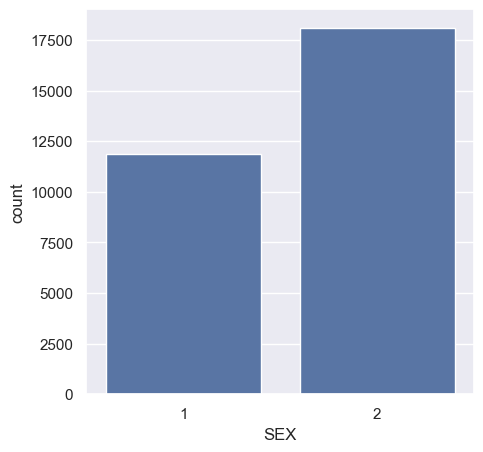

In [16]:
sns.set()
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams.update({'font.size': 16})

sns.countplot(x = data['SEX'])
plt.show()

We can also have multiple plots on the same 'figure' using subplots. Here is an example of how you can achieve that:

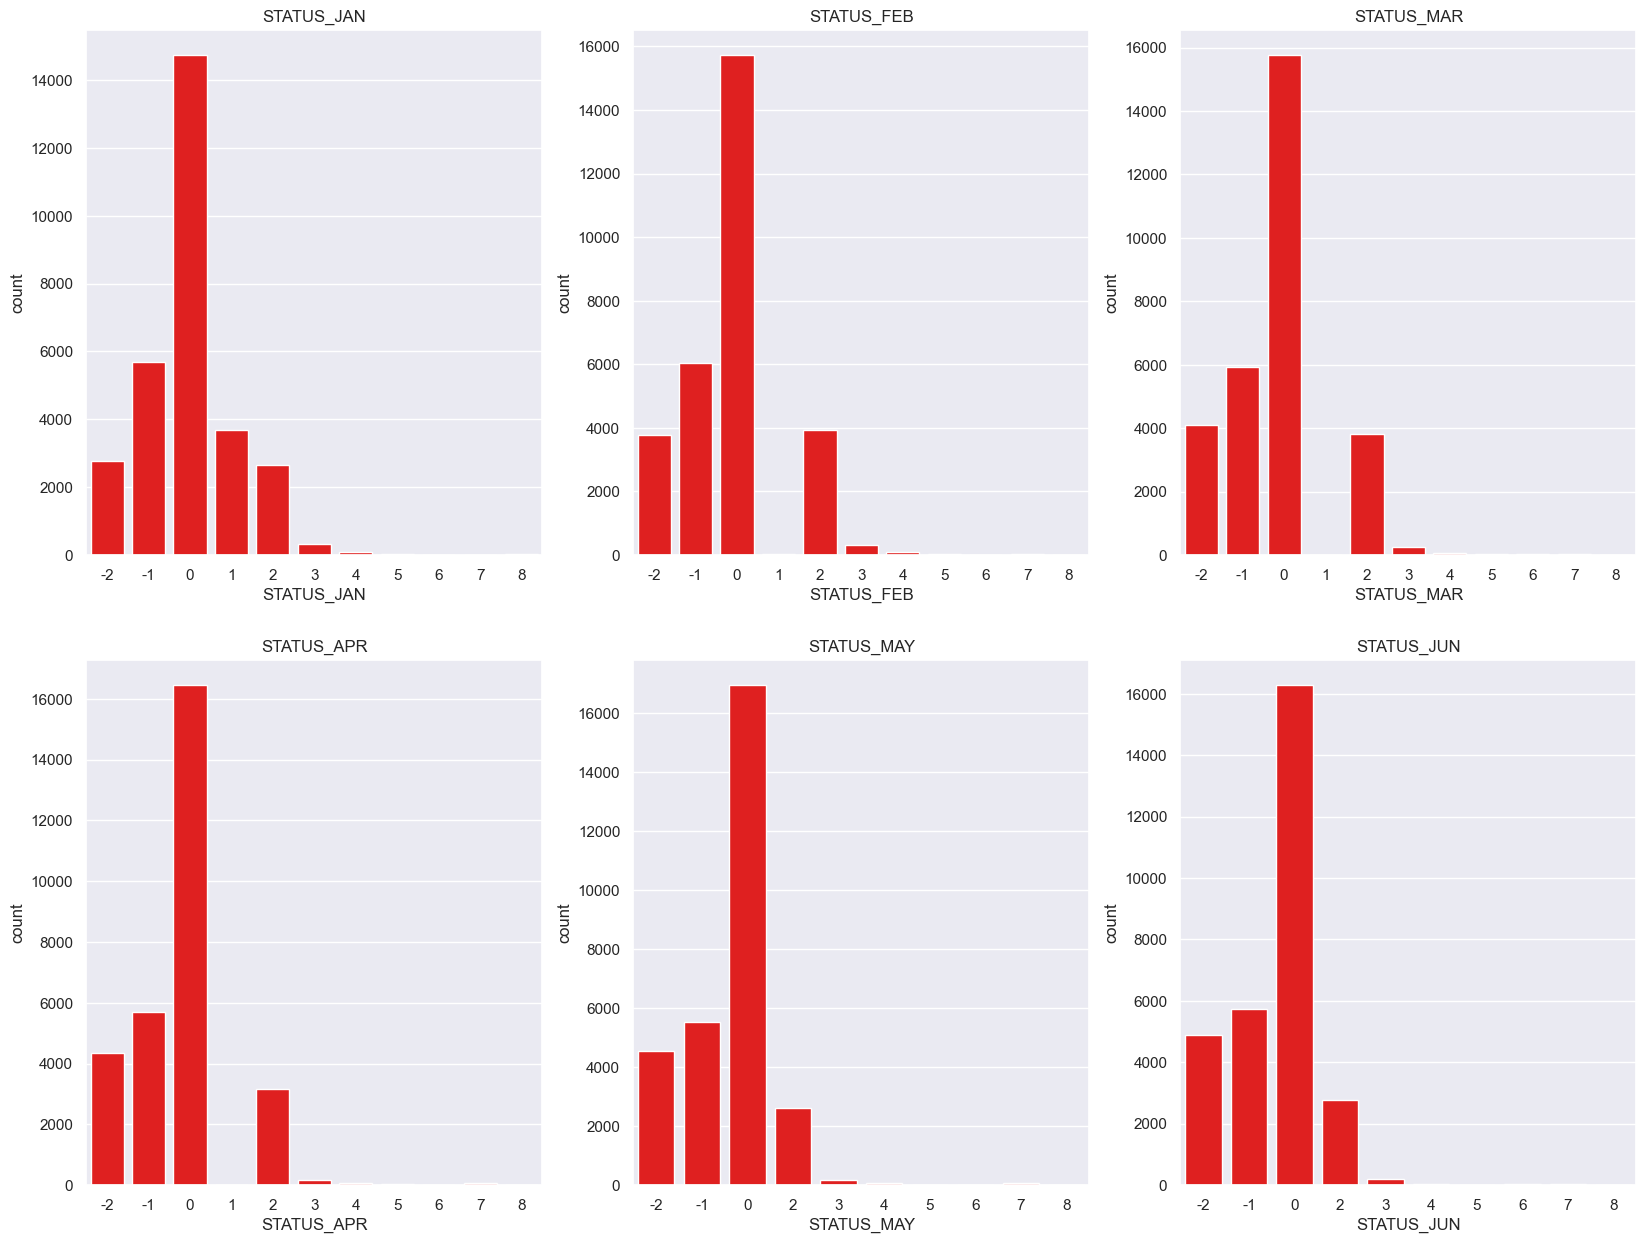

In [17]:
# Let's create a larger drawing area
plt.rcParams['figure.figsize'] = (20.0, 15.0)

# Then we define the number of subplots we want
# by giving the number of rows and columns needed
fig, axes = plt.subplots(ncols=3, nrows=2)

# Each subplot will be drawn on a set of axis. To have
# one plot on each, we need to iterate through the axes
# and plot directly on them
for ax, col in zip(axes.flat, statuses):
    # If we want to plot the features as categorical variables
    # we can use the same syntax as previously
    sns.countplot(x = data[col], ax=ax, color='red')

    # However, you will note that when we are missing an entry
    # (e.g. 1 in STATUS_JUN), there is no gap created. Depending
    # on the style of plot you wand you can work around it using
    # the following (comment the sns line above and uncomment
    # the code below to test)

    #counts  = data[col].value_counts()
    #ax.bar(counts.index, counts, align='center')

    ax.set_title(col)
plt.show()

Really make sure you undestand what this code is doing - play around with it, find out what "zip" does and ensure you understand what the loop is doing.

### Step 3b: Investigating Variables, via some nice summary Histograms
Histograms paint a great picture of the distribution of the data. They can be done using the matplotlib hist() function or the distplot() function of Seaborn or directly from your Pandas dataframe. Here are examples of the 3 options:

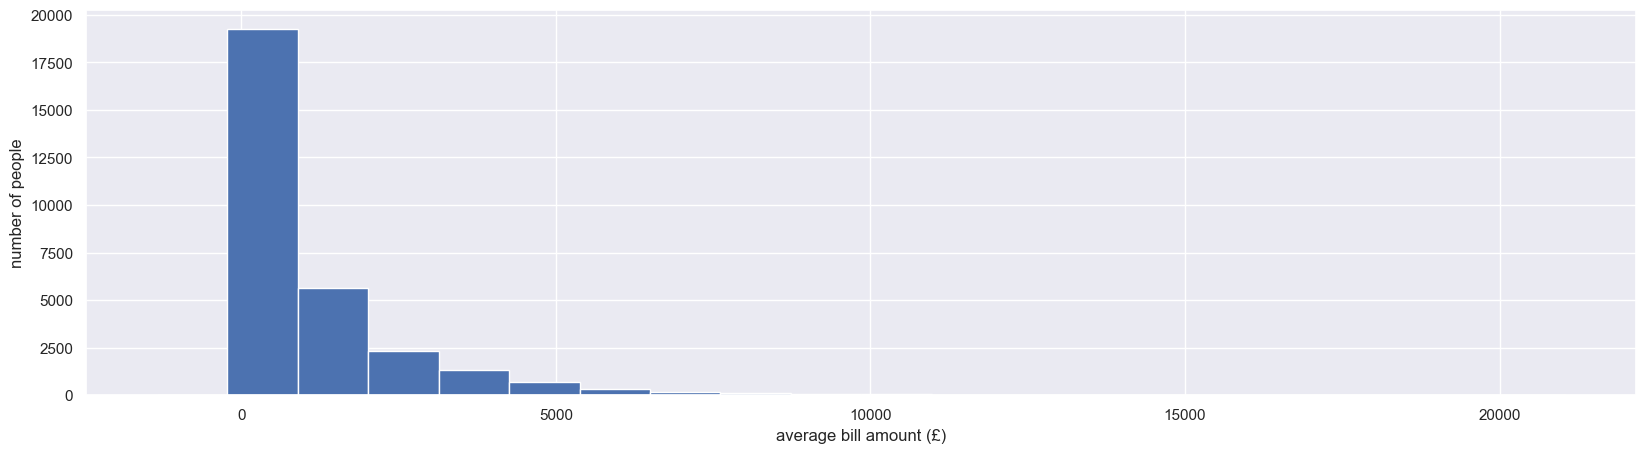

In [18]:
#-- For each person what's the average on their account each month?

# Option 1 : Matplotlib
plt.rcParams['figure.figsize'] = (20.0, 5.0)

#-- add your histogram line here!
plt.hist(data[bills].mean(axis=1), 20)

#-- some labelling.
plt.xlabel("average bill amount (£)")
plt.ylabel("number of people")
plt.show()

/var/folders/kf/5c3rzd1n3mg01xt7v99dzfvr0000gn/T/ipykernel_15675/559242107.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[bills].mean(axis=1), kde=False)


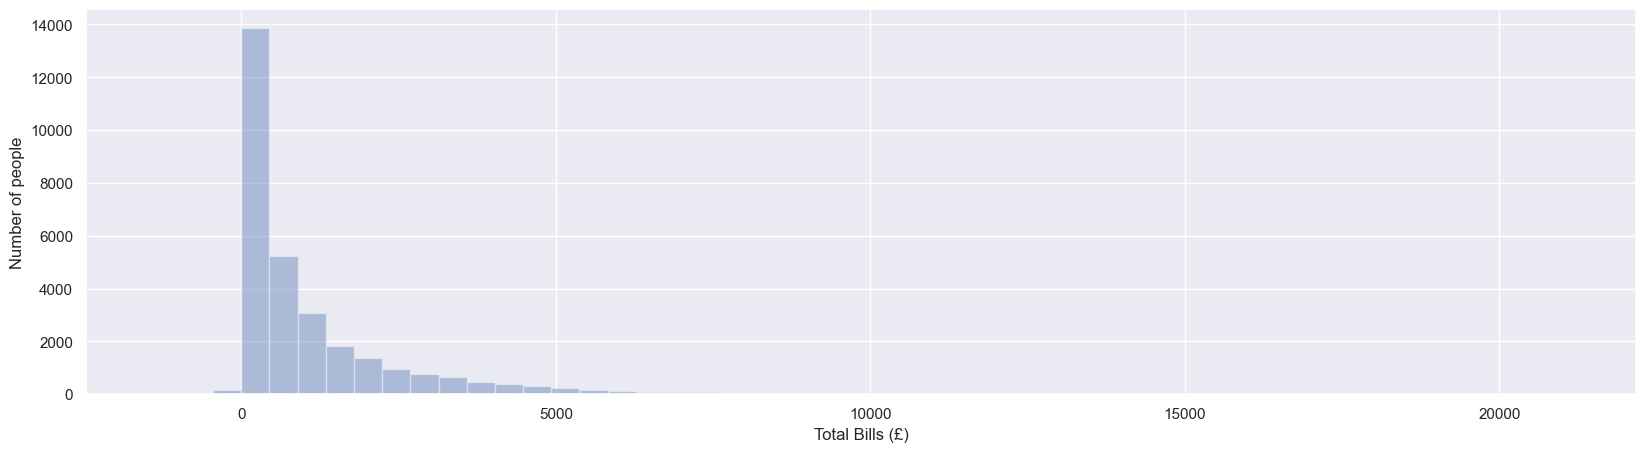

In [19]:
# Option 2: Seaborn
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.set()
ax = sns.distplot(data[bills].mean(axis=1), kde=False)
ax.set(xlabel='Total Bills (£)', ylabel='Number of people')
plt.show()

<Axes: ylabel='Frequency'>

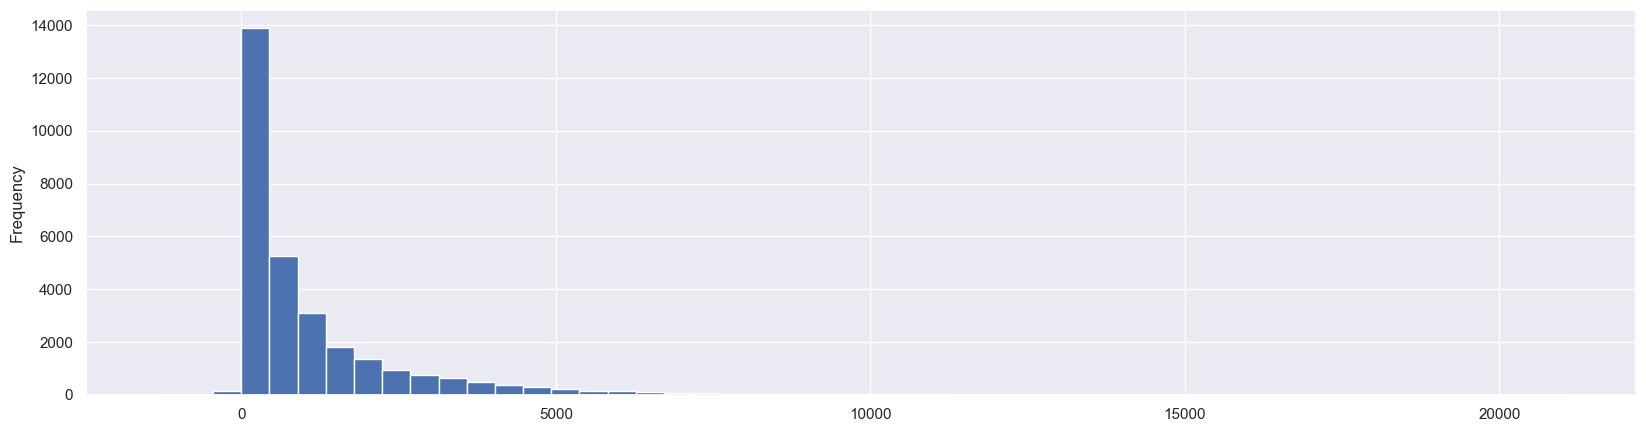

In [20]:
# Option 3: Pandas
data[bills].mean(axis=1).plot(kind='hist', bins=50)

<span style="font-weight:bold; color:green;">&rarr;  And if you've managed that, let's make one histogram for peoples "LIMIT" field, with 50 bins and using the colour purple:</span>

In [ ]:
# Your code here

### Step 3c: Investigating the Charge-off rate ("DEFAULTED")

Great, we have some good summaries there, and now let's make predictions. First off, let's start with an overarching view of the problem. We want to predict defaulting, Let's answer the following questions:

* What are the options (i.e. possible values) that we are trying to predict?
* What is the breakdown (i.e. percentages) of these options?

DEFAULTED
0    23364
1     6636
Name: count, dtype: int64

Defaulting accounts are 22.12% out of 30000 observations


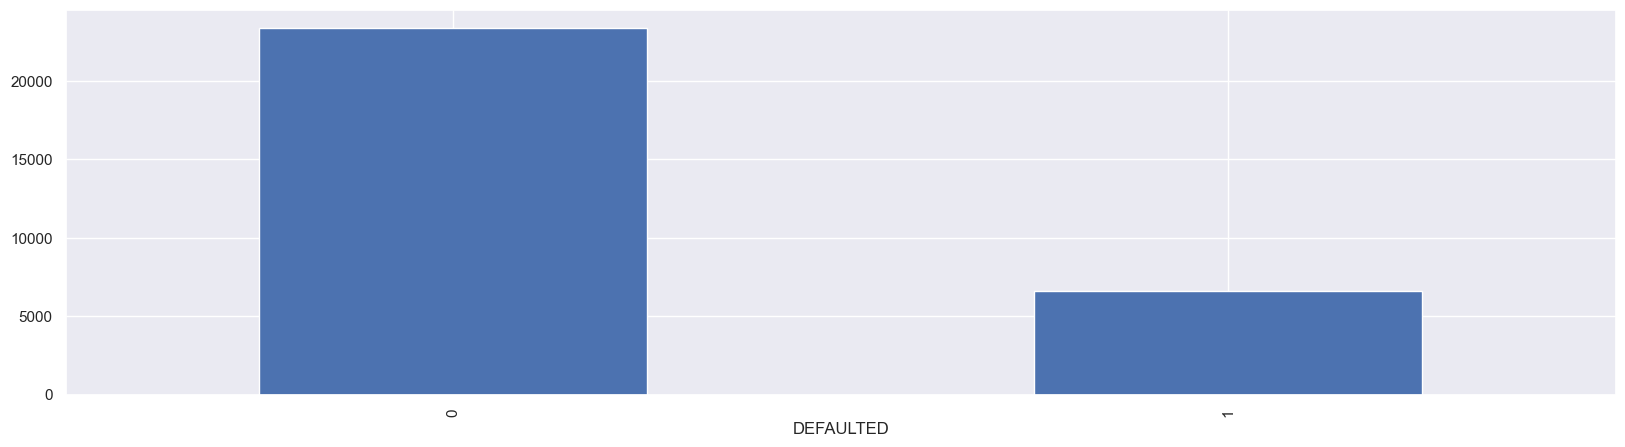

In [21]:
# Using Pandas
# Option 1 : value_counts()
summary = data['DEFAULTED'].value_counts()
print(summary)
print("\nDefaulting accounts are {}% out of {} observations".format(summary[1] / len(data) * 100, len(data)))

summary.plot(kind='bar');



DEFAULTED
0    23364
1     6636
dtype: int64


            LIMIT  SEX  EDUCATION  MARRIAGE   AGE  STATUS_JAN  STATUS_FEB  \
DEFAULTED                                                                   
0          3600.0  2.0        2.0       2.0  34.0         0.0         0.0   
1          2200.0  2.0        2.0       2.0  34.0         1.0         0.0   

           STATUS_MAR  STATUS_APR  STATUS_MAY  ...  BILL_MAR  BILL_APR  \
DEFAULTED                                      ...                       
0                 0.0         0.0         0.0  ...   484.860   456.000   
1                 0.0         0.0         0.0  ...   476.028   458.868   

           BILL_MAY  BILL_JUN  PAY_JAN  PAY_FEB  PAY_MAR  PAY_APR  PAY_MAY  \
DEFAULTED                                                                    
0           431.952   400.296   59.028   53.940   48.000   41.616    42.36   
1           443.484   432.684   39.264   36.804   29.328   24.000    24.00   

           PAY_JUN  
DEFAULTED  

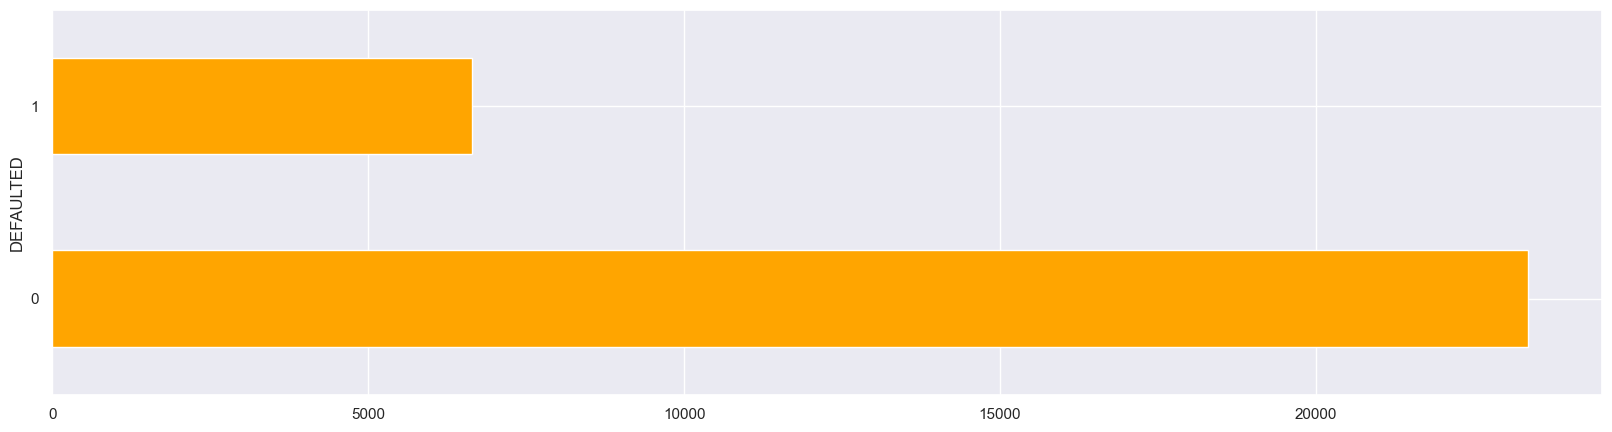

In [22]:
# Option 2 : groupby()
d = data.groupby(['DEFAULTED'])
print(d)
print('\n')
print(d.size())
print('\n')
print(d.median())
d.size().plot(kind='barh', color='orange');

<Axes: xlabel='count', ylabel='DEFAULTED'>

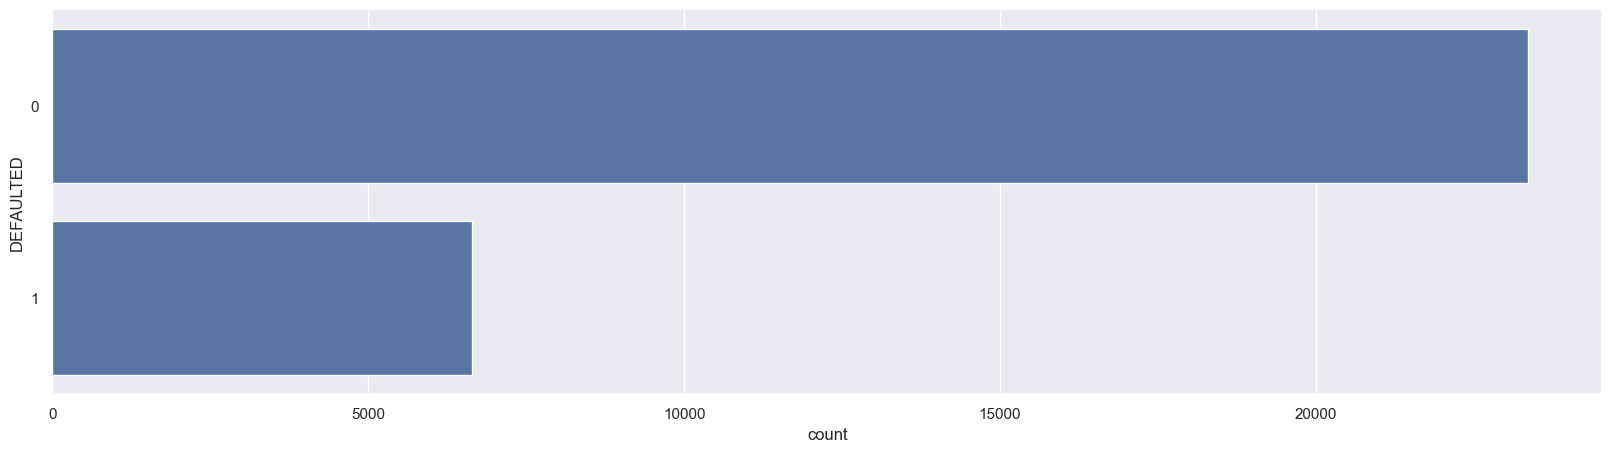

In [23]:
# Option 3: Using only seaborn

sns.countplot(y=data['DEFAULTED'])

### Step  4: Feature Engineering (For now exploring some other statistics!)
At this stage we would normally start considering how to create "better features" for our model. We are not going to do this yet (this awaits you in the future) so now instead let's have a look at a number of histograms to see how defaulting is correlated with the categorical variables available, before that let's make use of categorical features of pandas. We would then normally use this interaction information to merge variables and create new 'engineered features' - but let's be descriptive for the moment!

<span style="font-weight:bold; color:green;">&rarr;  Make sure you understand what is going on here:</span>

<Axes: xlabel='DEFAULTED', ylabel='count'>

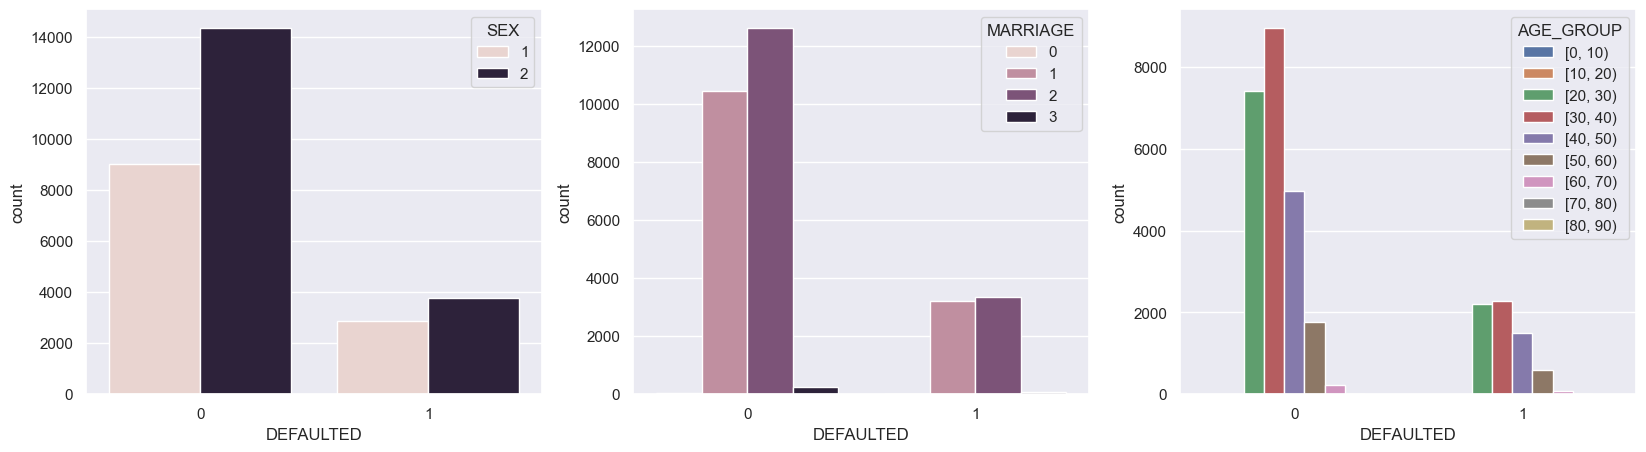

In [24]:
import pandas
# Creating age groups:
data['AGE_GROUP'] = pandas.cut(data['AGE'], range(0, 100, 10), right=False)

fig, axes = plt.subplots(1,3)
sns.countplot(x='DEFAULTED', data=data[['DEFAULTED','SEX']], hue='SEX', ax=axes[0])
sns.countplot(x='DEFAULTED', data=data[['DEFAULTED','MARRIAGE']], hue='MARRIAGE', ax=axes[1])
sns.countplot(x='DEFAULTED', data=data[['DEFAULTED','AGE_GROUP']], hue='AGE_GROUP', ax=axes[2])

In [ ]:
# re-do in another way?


Note, how pandas let us really easily cut up the age into categories using the "cut()" function. Remember you never need to memorize these - just know they exist and then refer to prior examples or the web documentation.

### Step 5a: Establish Experimental Framework (for your predictive models)
Ok, great we have our features, some understanding of them (although we've decided to leave them all in the mix) so we now need to setup our framework for how we are going to test them in models! We are going to start with a simple approach with a split of our data in a training (80%) and testing (20%) sets and then train and evaluate the performance of a Dummy Classifier (a mode "point model" in sklearn terminology).

Whilst it is a 'Dummy', it is a good place to start for us to establish a baseline and compare more advanced models to it in the next steps.

In [25]:
from sklearn import dummy
from sklearn.model_selection import train_test_split

#-- setup our training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#-- create a dummy classifier as our baseline
dc = dummy.DummyClassifier()

#-- Fit the model on the training set
dc.fit(X_train, Y_train)

#-- Obtain the score (performance) of our classifier
#-- on the testing set
score = dc.score(X_test, Y_test)

#-- print the results
print("Baseline Accuracy:", score)
print(len(Y.values))

Baseline Accuracy: 0.7821666666666667
30000


### Step 5b: Setting up Folds and Cross Validation

We now have our first classifier setup, however we used a very basic approach to create our training and testing sets. We now want to have something a bit more advanced and use folds and cross validation to evaluate the performance of our classifiers. Here is how you do it for the Dummy Classifier:

In [26]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#-- setup our folds
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#-- create a dummy classifier as our baseline
dc = dummy.DummyClassifier()

#-- test with cross validation
dc_scores = cross_val_score(dc, X, Y, scoring='accuracy', cv=folds)

#-- print the results
print("Baseline Accuracy:", np.mean(dc_scores))
print(len(Y.values))

Baseline Accuracy: 0.7788
30000


### Step 5c: A sneak look at the Confusion Matrix setup

In addition to the performance of our classifier, we can also look into the confusion matrix and plot it. This is how it is done for the Dummy Classifier:

In [27]:
#-- example of a confusion matrix for dummy classifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

dc_pred = cross_val_predict(dc, X, Y, cv=folds)
print(dc_pred)

dc_matrix = confusion_matrix(Y, dc_pred)
print(dc_matrix)

[0 0 0 ... 0 0 0]
[[23364     0]
 [ 6636     0]]


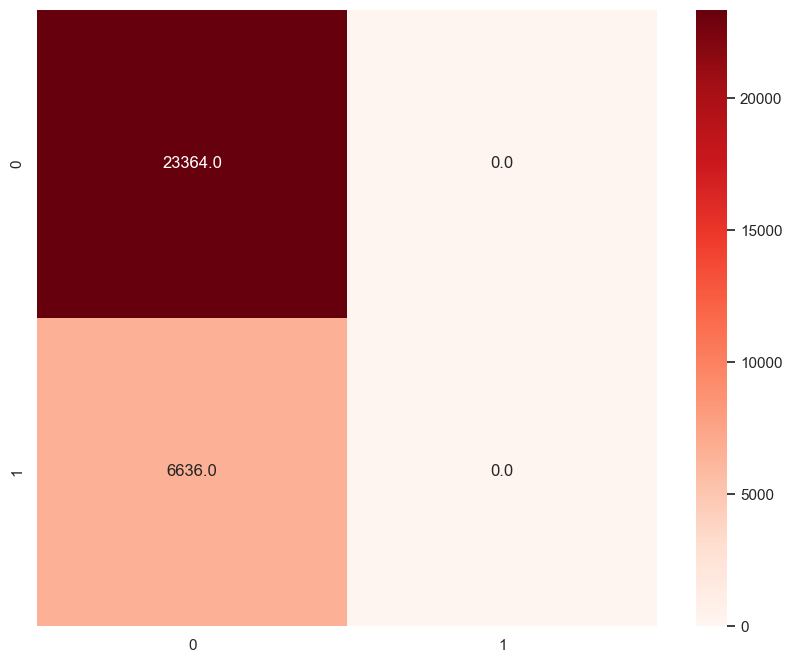

In [28]:
#-- display the confusion matrices as heatmaps.
# Again look for "heatmap" documentation online (seaborn does this well!)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.heatmap(dc_matrix, annot=True, fmt=".1f", cmap="Reds", cbar=True)
plt.show()

### Step 6: Create Models

Now that we have a working example for our baseline, the Dummy Classifier, we want to produce a real analysis. We will use a logistic regression and decision tree to see which one is best suited to our problem (normally we might test even more models such as Naive Bayes or Random Forests!).

Below is a template of the code that will get you there:

In [29]:
#-- Add the required imports for the new classifiers you want to add
from sklearn import linear_model
from sklearn import tree

#-- create three classifiers to compare
dc = dummy.DummyClassifier()
lr = linear_model.LogisticRegression(solver="liblinear", max_iter=1000)
dt = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7)

#-- setup our folds
folds = KFold(n_splits=5, shuffle=True, random_state=42)

#-- test with cross validation
lr_scores = cross_val_score(lr, X, Y, scoring='accuracy', cv=folds)
dt_scores = cross_val_score(dt, X, Y, scoring='accuracy', cv=folds)
dc_scores = cross_val_score(dc, X, Y, scoring='accuracy', cv=folds)

#-- print the results
print("Mean LR Accuracy:", np.mean(lr_scores))
print("Mean DT Accuracy:", np.mean(dt_scores))
print("Baseline Accuracy:", np.mean(dc_scores))
print(len(Y.values))

Mean LR Accuracy: 0.8088666666666666
Mean DT Accuracy: 0.7644333333333334
Baseline Accuracy: 0.7788
30000


### Step 7: Optimization

Note above that we use some fixed versions of our models and don't 'optimize' them as strictly as we will in the future (again this is for simplicity now). In particular, you noticed that we have created a decision tree with some fixed 'meta-parameters' (the depth of the tree and the minimum items that can be in any leaf), that we should normally try and find the best values for (i.e. optimize!) We will leave this for now, again out of simplicity.

### Step 8: Evaluation (using the Confusion Matrices)

You should now have a performance score attached to 3 different classifiers (note that we chose 'accuracy' - but the particular business case will always guide what you choose!). Based on that measure, you can identify the winner, i.e. the best performing classifier! For that classifier you can then obtain and plot its confusion matrix to better understand its performance and limitations.

The analysis part is the interpretation of that matrix and in particular how does it compares to the dummy classifier one?

In [30]:
# Your code here
dt_matrix = confusion_matrix(Y, cross_val_predict(dt, X, Y, cv=folds))
print(dt_matrix)

[[20525  2839]
 [ 4217  2419]]


In [31]:
# Your code here
lr_pred = cross_val_predict(lr, X, Y, cv=folds)
print(lr_pred)

lr_matrix = confusion_matrix(Y, lr_pred)
print(lr_matrix)

[1 0 0 ... 0 0 0]
[[22697   667]
 [ 5067  1569]]


### Step 9: Iterate and "Deploy" (i.e. Fit the best performing model to all your data!)

You have now identified the best performing model and as part of packaging it up for the client, you need to train it on the full available dataset that you have.

During this analytics, you have divided your dataset into training and testing sets (or into folds). That is crucial to evaluate how your models perform on unseen data. However, once the analytics is completed, you need to train the choosen model the best you can, that means using all the data you have available before passing it to your client.

So let's do it:

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=20, min_samples_leaf=7)
dt.fit(X, Y)
test = dt.predict(X)

## CONCLUSION: Assessing your progress
Review what you have covered in this exercise. You should now be able to understand:

* Loading in your data and splitting data into a test and training set.
* The ability to use temporal data in "bins" as individual features (e.g. STATUS_JAN, STATUS_FEB, ...).
* To create summary statistics via pandas **groupby()** function.
* To visualize those statistics as graphs using pandas built-in plot functions (as an alternative to calling matplotlib directly)
* To create and test several predictive models.
* To set up a validation strategy with sklearn's **KFolds()** tool.
* To obtain aggregate performance results using sklean's **cross_val_score()** function.
* To generate a finer grained confusion matrix using sklearn's **cross_val_predict()** function and **confusion_matrix()** tools.
* To visualize those results using a heatmap.

Remember that it is not necessarily memorizing these items which is key - but having an understanding of how to use them as a process, knowing how to re-find examples of their usage, and how to look up documentation when you are not sure.